## Submision Projek Akhir Klasifikasi Gambar

**Nama          : Marvi Yoga Pratama**

**Cohort ID     : mc222d5y1316**

**Email Academy : mc222d5y1316@student.devacademy.id**

**Link Dataset  : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset**

## Import Library

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Input

### Load CSV dan preview isinya

In [2]:
misrakahmed_vegetable_image_dataset_path = kagglehub.dataset_download('misrakahmed/vegetable-image-dataset')

print('Data source import complete.')

Data source import complete.


In [5]:
path  = '/kaggle/input/vegetable-image-dataset'

print('Dataset Path : ',path)

Dataset Path :  /kaggle/input/vegetable-image-dataset


In [6]:
dirs = os.listdir(path)

image_dirs = os.listdir(f'/{path}/{dirs[0]}')

sss = os.path.join(path,dirs[0])
print(os.listdir(sss))

paths = os.listdir(sss)
file_paths = []
file_names = []
file_labels=[]
for image in paths:
  image_path = os.path.join(sss,image)
  print(image_path)
  for directories in os.listdir(image_path):
      print(directories)
      for file in os.listdir(f'{image_path}/{directories}'):
          file_paths.append(f'{image_path}/{directories}/{file}')
          file_names.append(file)
          file_labels.append(directories)

dataset_df = pd.DataFrame({'path' : file_paths  , 'file_name' : file_names  , 'label' :file_labels})

['validation', 'test', 'train']
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato
/kaggle/input/vegetable-image-dataset/Vegetable Images/test
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato
/kaggle/input/vegetable-image-dataset/Vegetable Images/train
Broccoli
Capsicum
Bottle_Gourd
Radish
Tomato
Brinjal
Pumpkin
Carrot
Papaya
Cabbage
Bitter_Gourd
Cauliflower
Bean
Cucumber
Potato


**Cek label/kategori**

In [7]:
dataset_df.columns


Index(['path', 'file_name', 'label'], dtype='object')

### Ubah Label Multi-Class ke Single Label

In [8]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [9]:
# Ubah label string menjadi angka
dataset_df['label_encoded'] = label_encoder.fit_transform(dataset_df['label'])

In [10]:
# Lihat mapping label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Bean': np.int64(0), 'Bitter_Gourd': np.int64(1), 'Bottle_Gourd': np.int64(2), 'Brinjal': np.int64(3), 'Broccoli': np.int64(4), 'Cabbage': np.int64(5), 'Capsicum': np.int64(6), 'Carrot': np.int64(7), 'Cauliflower': np.int64(8), 'Cucumber': np.int64(9), 'Papaya': np.int64(10), 'Potato': np.int64(11), 'Pumpkin': np.int64(12), 'Radish': np.int64(13), 'Tomato': np.int64(14)}


In [11]:
# Contoh tampilan DataFrame
dataset_df.head()

,path,file_name,label,label_encoded
0,/kaggle/input/vegetable-image-dataset/Vegetabl...,1269.jpg,Broccoli,4
1,/kaggle/input/vegetable-image-dataset/Vegetabl...,1385.jpg,Broccoli,4
2,/kaggle/input/vegetable-image-dataset/Vegetabl...,1383.jpg,Broccoli,4
3,/kaggle/input/vegetable-image-dataset/Vegetabl...,1354.jpg,Broccoli,4
4,/kaggle/input/vegetable-image-dataset/Vegetabl...,1339.jpg,Broccoli,4


### Visualisasi Distribusi Label

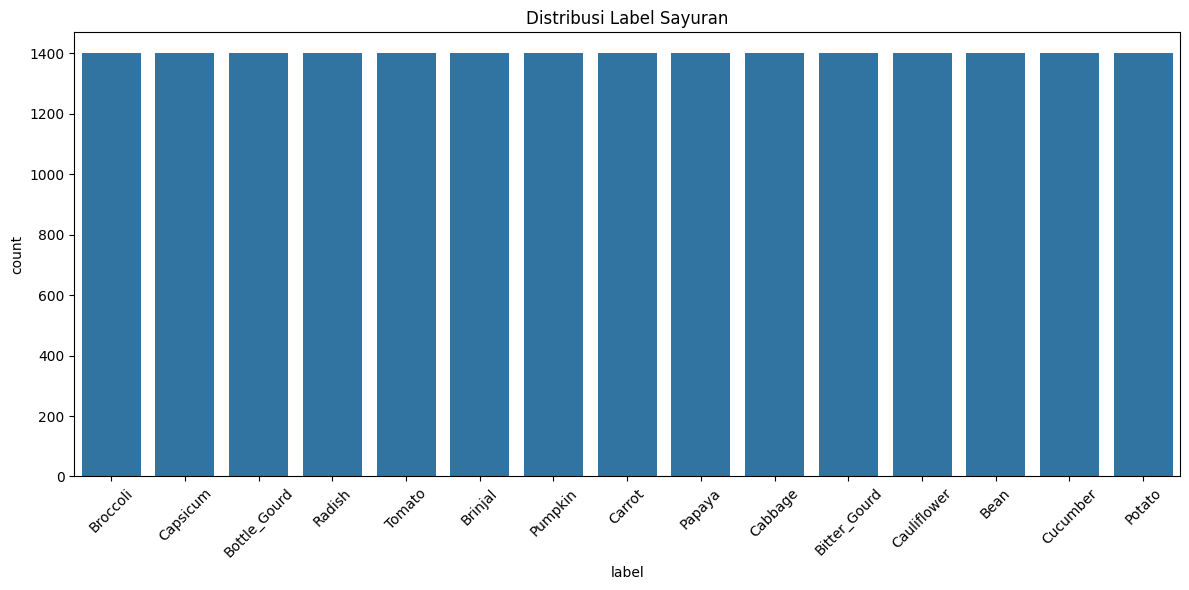

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset_df, x='label')
plt.xticks(rotation=45)
plt.title("Distribusi Label Sayuran")
plt.tight_layout()
plt.show()

### Split Dataset: Train, Validation, Test

**Split Dataset Train dan juga Test**

In [13]:
train_df, test_df = train_test_split(dataset_df, test_size=0.2, stratify=dataset_df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

Train: 13440 | Val: 3360 | Test: 4200


In [15]:
# Simpan hasil split
os.makedirs("hasil_split", exist_ok=True)

train_df.to_csv("hasil_split/train_split.csv", index=False)
val_df.to_csv("hasil_split/val_split.csv", index=False)
test_df.to_csv("hasil_split/test_split.csv", index=False)

### Data Augmentation & Generator

In [16]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

val_gen = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

test_gen = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 13440 validated image filenames belonging to 15 classes.
Found 3360 validated image filenames belonging to 15 classes.
Found 4200 validated image filenames belonging to 15 classes.


### Bangun Model CNN

In [17]:
num_classes = len(train_gen.class_indices)

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,287 (18.43 MB)

 Trainable params: 4,830,287 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

**Saya menggunakan Model CNN** untuk klasifikasi gambar dengan 4 kelas ini memiliki 3 blok konvolusi (Conv2D + MaxPooling2D) dengan jumlah filter berturut-turut 32, 64, dan 128. Input gambar berukuran 224x224 dengan 3 channel. Setelah ekstraksi fitur, layer Flatten meratakan output, diikuti Dropout 0.5. Layer Dense dengan 128 unit (ReLU) dan layer output dengan 4 neuron (softmax) digunakan untuk klasifikasi. Model dikompilasi dengan Adam, categorical_crossentropy, dan metrik akurasi. model.summary() menampilkan arsitektur dan jumlah parameter.

### Training Model

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)


# Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 96s 228ms/step - accuracy: 0.9424 - loss: 0.1824 - val_accuracy: 0.9423 - val_loss: 0.1909
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 97s 231ms/step - accuracy: 0.9478 - loss: 0.1683 - val_accuracy: 0.9250 - val_loss: 0.2221
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 140s 227ms/step - accuracy: 0.9507 - loss: 0.1536 - val_accuracy: 0.9515 - val_loss: 0.1683
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 96s 228ms/step - accuracy: 0.9526 - loss: 0.1390 - val_accuracy: 0.9461 - val_loss: 0.1848
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 94s 224ms/step - accuracy: 0.9538 - loss: 0.1356 - val_accuracy: 0.9479 - val_loss: 0.1884
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 94s 225ms/step - accuracy: 0.9581 - loss: 0.1349 - val_accuracy: 0.9372 - val_loss: 0.2301
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 95s 227ms/step - accuracy: 0.9610 - loss: 0.1287 - val_accuracy: 0.9551 - val_loss: 0.1791
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 93s 222ms/step - accuracy: 0.9652 - loss: 

###  Evaluasi Akurasi Test Set

In [28]:
# Evaluasi performa model pada data test
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Akurasi pada data test: {test_accuracy * 100:.2f}%")


132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9796 - loss: 0.0834
Akurasi pada data test: 97.71%


### Laporan Klasifikasi Lengkap

In [29]:
# Prediksi pada data test
y_pred_probs = model.predict(test_gen)
y_pred = y_pred_probs.argmax(axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step
Classification Report:

              precision    recall  f1-score   support

        Bean       0.97      0.99      0.98       280
Bitter_Gourd       0.99      0.99      0.99       280
Bottle_Gourd       0.98      0.99      0.99       280
     Brinjal       0.97      0.97      0.97       280
    Broccoli       0.97      0.96      0.97       280
     Cabbage       0.97      0.96      0.97       280
    Capsicum       0.97      0.99      0.98       280
      Carrot       1.00      0.97      0.98       280
 Cauliflower       0.97      0.95      0.96       280
    Cucumber       0.99      0.99      0.99       280
      Papaya       0.98      0.97      0.98       280
      Potato       1.00      0.99      0.99       280
     Pumpkin       0.98      0.96      0.97       280
      Radish       0.98      1.00      0.99       280
      Tomato       0.94      0.97      0.96       280

    accuracy                           0.98      4200
   macro avg  

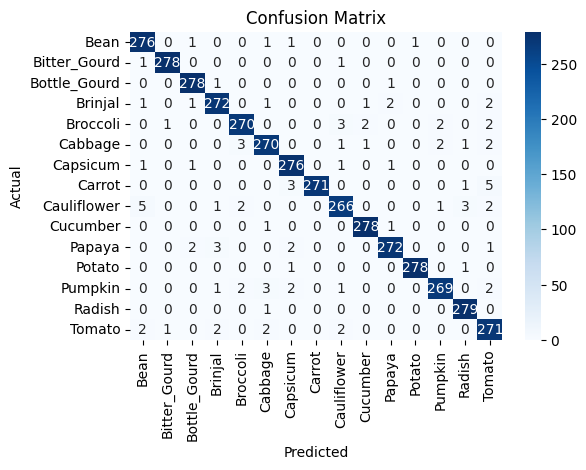

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Visualisasi Akurasi & Loss

**Akurasi**

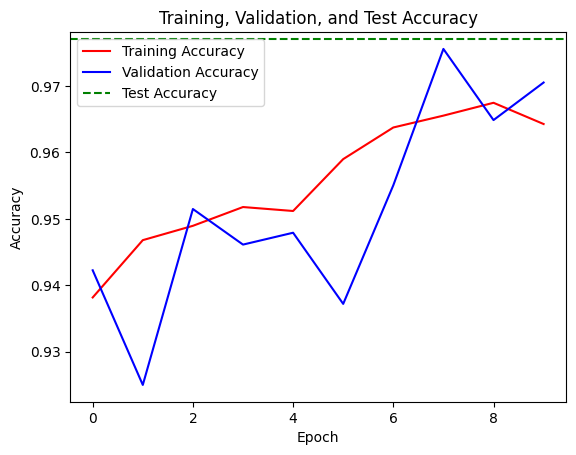

In [31]:
# Visualisasi Training, Validation, dan Test Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Loss**

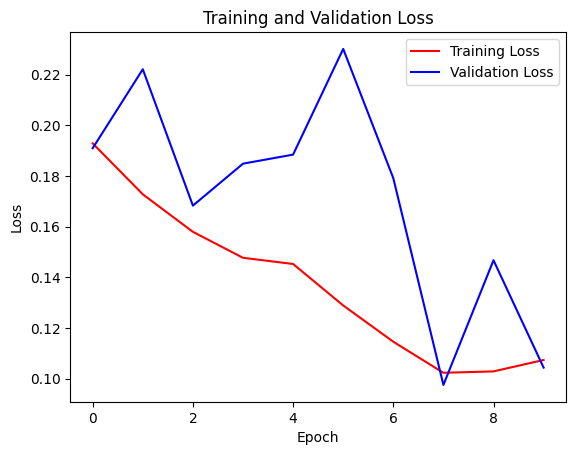

In [32]:
# Visualisasi loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Simpan Sebagai SavedModel

In [ ]:
model.export("saved_model")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139502211157840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211158608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211161488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211160336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211160912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211162256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211159760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211163216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211161872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139502211164560: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Konversi ke TensorFlow Lite (TFLite)

**Instalasi TensorFlow.JS**

In [ ]:
!pip install tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
!pip show tensorflowjs

Name: tensorflowjs
Version: 4.22.0
Summary: 
Home-page: https://js.tensorflow.org/
Author: Google LLC
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: flax, importlib_resources, jax, jaxlib, packaging, six, tensorflow, tensorflow-decision-forests, tensorflow-hub, tf-keras
Required-by: 


In [ ]:
# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras best_model.h5 tfjs_model

2025-04-24 14:16:53.033224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745504213.090886   12347 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745504213.110720   12347 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")

tflite_model = converter.convert()

# Simpan ke file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

In [33]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.21.0.37.6
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confect